In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv(r"D:\CODSOFT\iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# to display stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# to display no. of samples on each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [10]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
df.shape

(150, 5)

<AxesSubplot:>

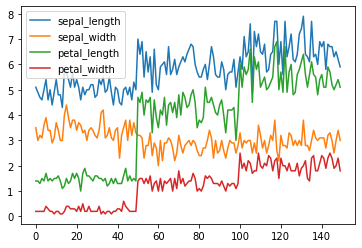

In [13]:
df.plot()

In [14]:
df.max()

sepal_length               7.9
sepal_width                4.4
petal_length               6.9
petal_width                2.5
species         Iris-virginica
dtype: object

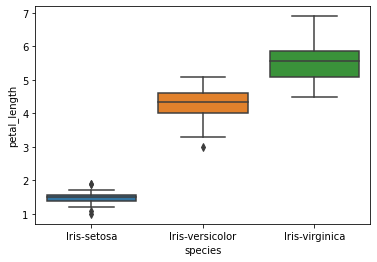

In [15]:
sns.boxplot(x="species", y='petal_length', data=df ) 
plt.show()

<AxesSubplot:xlabel='species', ylabel='petal_width'>

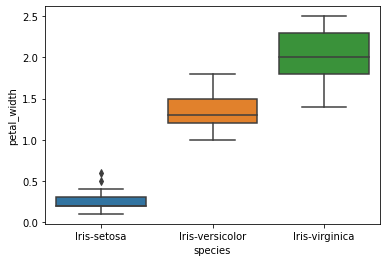

In [16]:
sns.boxplot(x="species", y="petal_width", data=df)

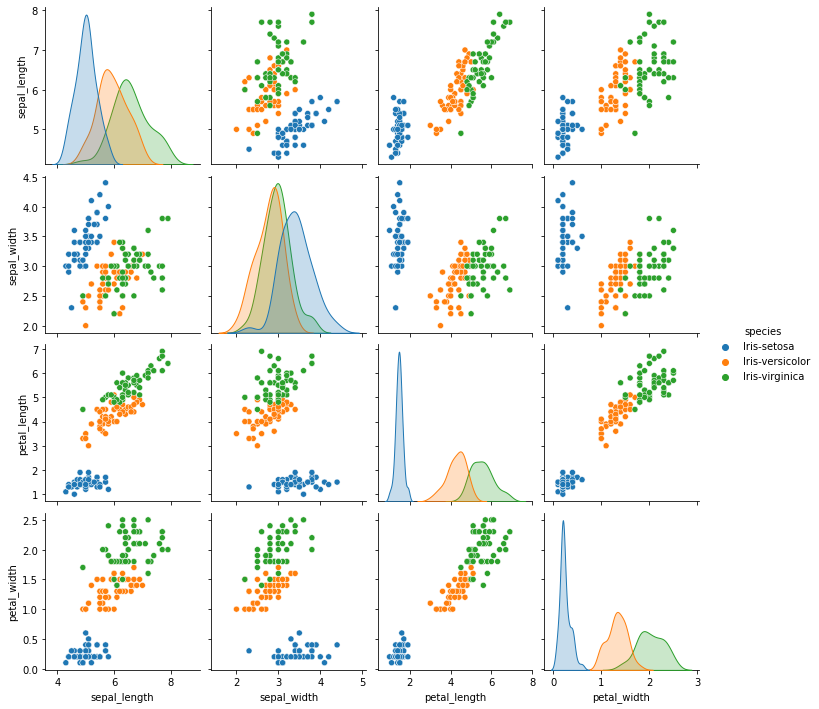

In [17]:
sns.pairplot(df,hue = "species")

Text(0.5, 1.0, 'Histogram')

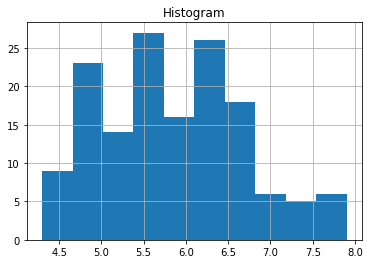

In [18]:
df['sepal_length'].hist()
plt.title('Histogram')

Text(0.5, 1.0, 'Histogram')

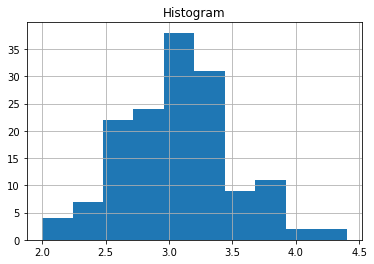

In [19]:
df['sepal_width'].hist()
plt.title('Histogram')

Text(0.5, 1.0, 'Histogram')

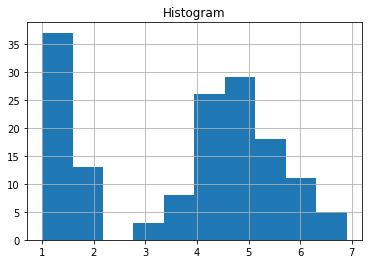

In [20]:
df['petal_length'].hist()
plt.title('Histogram')

Text(0.5, 1.0, 'Histogram')

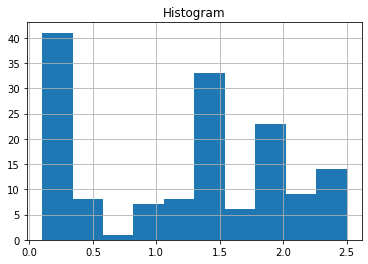

In [21]:
df['petal_width'].hist()
plt.title('Histogram')

Text(0.5, 1.0, 'Histogram')

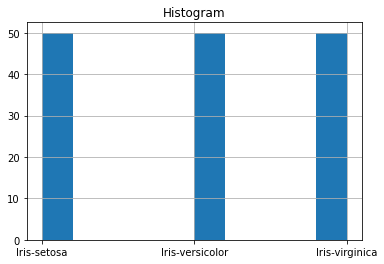

In [22]:
df['species'].hist()
plt.title('Histogram')

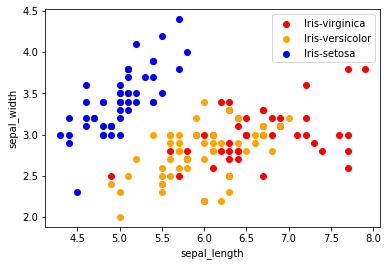

In [23]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()

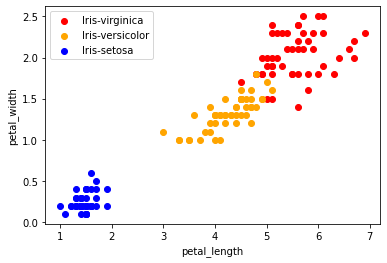

In [24]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

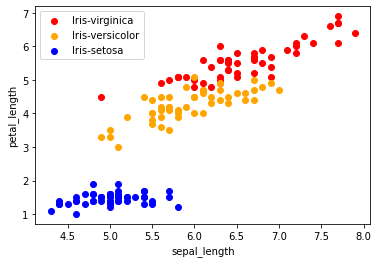

In [25]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()


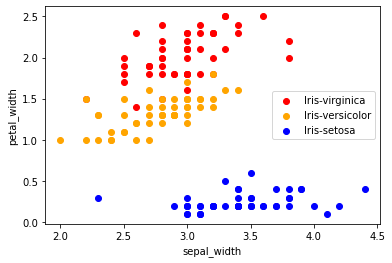

In [26]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.legend()

In [27]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

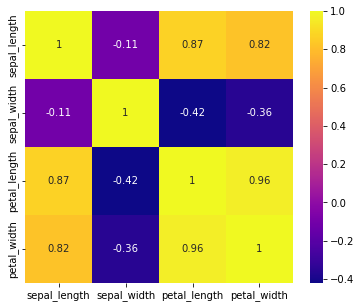

In [28]:
corr = df.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap = 'plasma')

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['species'])
Y =df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [32]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
# model training
model.fit(x_train, y_train)


LogisticRegression()

In [34]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [35]:
y_pred=model.predict(x_train)
y_pred

array([0, 2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 2,
       0, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0,
       1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1])

In [36]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [37]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [38]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [40]:
#Dataset source:https://www.kaggle.com/datasets/arshid/iris-flower-dataset

This project is made by Anshu kumar during internship at codsoft